## QUESTIONS.
## 1- What is the content distribution on Netflix movies vs TV shows?
## 2- Is the majority content on Netflix made for adults or kids?
## 3- Which year was the highest release quantity contents on Netflix?
## 4- What are the countries with more content realased?

In [52]:
#Started with importing libraries.
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


In [53]:
#Reading the csv file.
data_file = Path("Resources/Netflix.csv")
df_Netflix = pd.read_csv(data_file)
df_Netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...


Here we start the DATA EXPLORATION checking columns, dataset size, some potential statistical numbers and, data in general.

In [54]:
#Checking the columns name.
df_Netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [55]:
#Checking the dataset size.
df_Netflix.shape

(7787, 12)

In [ ]:
#Checking for data types.
df_Netflix.dtypes

In [56]:
#Checking some potential statistical values.
df_Netflix.describe()

,release_year,duration
count,7787.000000,7787.000000
mean,2013.932580,69.122769
std,8.757395,50.950743
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2018.000000,106.000000
max,2021.000000,312.000000


In [57]:
#looking at the column 'COUNTRY', we found that there is more than one value in the same column.
df_Netflix['country']

0                       Brazil
1                        India
2                    Indonesia
3                United States
4               United Kingdom
                 ...          
7782                    Canada
7783                     Japan
7784    France, Belgium, Spain
7785             United States
7786             United States
Name: country, Length: 7787, dtype: object

In [58]:
#The same happens with the column 'GENRES', there is more than one value in the same column.
df_Netflix['genres']

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1          Horror Movies, International Movies, Thrillers
2             Dramas, International Movies, Sports Movies
3                                                Comedies
4       British TV Shows, Docuseries, Science & Nature TV
                              ...                        
7782                   International TV Shows, Reality TV
7783                 Anime Series, International TV Shows
7784     Dramas, Independent Movies, International Movies
7785                 Comedies, Dramas, Independent Movies
7786          Dramas, Independent Movies, Romantic Movies
Name: genres, Length: 7787, dtype: object

Here we start the DATA CLEANING.

In [59]:
#spliting all the values in the columns 'Country' and saving in a variable.
df_split_country = df_Netflix['country'].str.split(',', expand=True)
df_split_country.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Brazil,None,None,None,None,None,None,None,None,None,None,None
1,India,None,None,None,None,None,None,None,None,None,None,None
2,Indonesia,None,None,None,None,None,None,None,None,None,None,None
3,United States,None,None,None,None,None,None,None,None,None,None,None
4,United Kingdom,None,None,None,None,None,None,None,None,None,None,None


In [60]:
#merging the splitted countries into the dataset.
df_Netflix_merged_country = pd.merge(df_Netflix, df_split_country, left_index=True, right_index=True)
df_Netflix_merged_country.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,2,3,4,5,6,7,8,9,10,11
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,...,None,None,None,None,None,None,None,None,None,None
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,...,None,None,None,None,None,None,None,None,None,None
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,...,None,None,None,None,None,None,None,None,None,None
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,...,None,None,None,None,None,None,None,None,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,...,None,None,None,None,None,None,None,None,None,None


In [61]:
#The original column 'Country' is not necessary anymore so we dropped.
df_Netflix_merged_country.drop(columns=['country'], inplace=True)
df_Netflix_merged_country.head()


,show_id,type,title,director,cast,date_added,release_year,rating,duration,genres,...,2,3,4,5,6,7,8,9,10,11
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,None,None,None,None,None,None,None,None,None,None
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",...,None,None,None,None,None,None,None,None,None,None
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",...,None,None,None,None,None,None,None,None,None,None
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,Comedies,...,None,None,None,None,None,None,None,None,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",...,None,None,None,None,None,None,None,None,None,None


In [62]:
#Renaming all the new columns with meaningful names.
df_Netflix_merged_country =  df_Netflix_merged_country.rename(columns = {0:'country1',
                                                                        1:'country2',
                                                                        2:'country3',
                                                                        3:'country4',
                                                                        4:'country5',
                                                                        5:'country6',
                                                                        6:'country7',
                                                                        7:'country8',
                                                                        8:'country9',
                                                                        9:'country10',
                                                                        10:'country11',
                                                                        11:'country12'})
df_Netflix_merged_country.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,genres,...,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,None,None,None,None,None,None,None,None,None,None
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",...,None,None,None,None,None,None,None,None,None,None
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",...,None,None,None,None,None,None,None,None,None,None
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,Comedies,...,None,None,None,None,None,None,None,None,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",...,None,None,None,None,None,None,None,None,None,None


In [63]:
##splitting all the values in the columns 'genres' and saving in a variable.
df_split_genre= df_Netflix['genres'].str.split(',', expand=True)
df_split_genre.head()

,0,1,2
0,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,Horror Movies,International Movies,Thrillers
2,Dramas,International Movies,Sports Movies
3,Comedies,None,None
4,British TV Shows,Docuseries,Science & Nature TV


In [64]:
#merging the splitted genres into the dataset.
df_Netflix_merged_country_genre = pd.merge(df_Netflix_merged_country, df_split_genre, left_index=True, right_index=True)
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,genres,...,country6,country7,country8,country9,country10,country11,country12,0,1,2
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,None,None,None,None,None,None,None,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",...,None,None,None,None,None,None,None,Horror Movies,International Movies,Thrillers
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",...,None,None,None,None,None,None,None,Dramas,International Movies,Sports Movies
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,Comedies,...,None,None,None,None,None,None,None,Comedies,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",...,None,None,None,None,None,None,None,British TV Shows,Docuseries,Science & Nature TV


In [65]:
#The original column 'Genres' is not necessary anymore so we dropped.
df_Netflix_merged_country_genre.drop(columns=['genres'], inplace=True)
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,...,country6,country7,country8,country9,country10,country11,country12,0,1,2
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,...,None,None,None,None,None,None,None,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,...,None,None,None,None,None,None,None,Horror Movies,International Movies,Thrillers
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,...,None,None,None,None,None,None,None,Dramas,International Movies,Sports Movies
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,...,None,None,None,None,None,None,None,Comedies,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,...,None,None,None,None,None,None,None,British TV Shows,Docuseries,Science & Nature TV


In [66]:
#Renaming all the new columns with meaningful names.
df_Netflix_merged_country_genre =  df_Netflix_merged_country_genre.rename(columns = {0:'genre1',
                                                                                    1:'genre2',
                                                                                    2:'genre3',
                                                                                    })
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,...,country6,country7,country8,country9,country10,country11,country12,genre1,genre2,genre3
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,...,None,None,None,None,None,None,None,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,...,None,None,None,None,None,None,None,Horror Movies,International Movies,Thrillers
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,...,None,None,None,None,None,None,None,Dramas,International Movies,Sports Movies
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,...,None,None,None,None,None,None,None,Comedies,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,...,None,None,None,None,None,None,None,British TV Shows,Docuseries,Science & Nature TV


We did a quick google research with 10 random movies and TV shows titles to understand which country among all of the countries columns we should keep and we decided to keep the first country columns value.

In [67]:
#Dropping all the others countries and keeping only the first country value.
df_Netflix_merged_country_genre.drop(columns=['country2','country3','country4','country5','country6','country7','country8','country9','country10', 'country11', 'country12'],inplace=True)
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country1,genre1,genre2,genre3
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,Brazil,International TV Shows,TV Dramas,TV Sci-Fi & Fantasy
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,India,Horror Movies,International Movies,Thrillers
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,Indonesia,Dramas,International Movies,Sports Movies
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,United States,Comedies,None,None
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,United Kingdom,British TV Shows,Docuseries,Science & Nature TV


In [68]:
#The same for genres.
#Dropping all the others genres and keeping only the first genre value.
df_Netflix_merged_country_genre.drop(columns=['genre2','genre3'],inplace=True)
df_Netflix_merged_country_genre.head()

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country1,genre1
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,Brazil,International TV Shows
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,India,Horror Movies
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,Indonesia,Dramas
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,United States,Comedies
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,United Kingdom,British TV Shows


In [69]:
#checking the year of 2021 we realized that there is only data from January/2021.
df_Netflix_merged_country_genre.loc[df_Netflix_merged_country_genre['release_year'] == 2021,:]

,show_id,type,title,director,cast,date_added,release_year,rating,duration,description,country1,genre1
250,s1223,TV Show,Carmen Sandiego,NaN,"Gina Rodriguez, Finn Wolfhard, Abby Trott, Mic...",15-Jan-21,2021,TV-Y7,4,"A master thief who uses her skills for good, C...",United States,Kids' TV
319,s1286,Movie,Charming,Ross Venokur,"Wilmer Valderrama, Demi Lovato, Sia, Nia Varda...",08-Jan-21,2021,TV-Y7,85,"On the eve of his 21st birthday, an adored pri...",Canada,Children & Family Movies
397,s1356,Movie,Chris Rock Total Blackout: The Tamborine Exten...,Chris Rock,Chris Rock,12-Jan-21,2021,TV-MA,98,"In this extended cut of his 2018 special, Chri...",NaN,Stand-Up Comedy
492,s1441,TV Show,Cobra Kai,NaN,"Ralph Macchio, William Zabka, Xolo Maridueña, ...",01-Jan-21,2021,TV-14,3,Decades after the tournament that changed thei...,United States,TV Action & Adventure
574,s1515,Movie,"Crack: Cocaine, Corruption & Conspiracy",Stanley Nelson,NaN,11-Jan-21,2021,TV-MA,90,"A cheap, powerful drug emerges during a recess...",United States,Documentaries
589,s1529,Movie,Creating The Queen's Gambit,NaN,NaN,08-Jan-21,2021,TV-14,14,A fascinating character. Exquisite sets. A wig...,NaN,Documentaries
869,s1781,TV Show,Disenchantment,NaN,"Abbi Jacobson, Eric André, Nat Faxon, John DiM...",15-Jan-21,2021,TV-14,3,"Princess duties call, but she'd rather be drin...",United States,TV Action & Adventure
962,s1865,TV Show,Dream Home Makeover,NaN,NaN,01-Jan-21,2021,TV-G,2,Dreams come true for real families looking for...,United States,Reality TV
1477,s2328,TV Show,Gabby's Dollhouse,NaN,"Laila Lockhart Kraner, Tucker Chandler, Juliet...",05-Jan-21,2021,TV-Y,1,"Cute cats, quirky crafts and colorful magic! J...",NaN,Kids' TV
1860,s2673,TV Show,Headspace Guide to Meditation,NaN,Andy Puddicombe,01-Jan-21,2021,TV-G,1,"Headspace takes a friendly, animated look at t...",United States,Docuseries


In [70]:
#We are not considering the year of 2021 because it isn't a full year.
df_Netflix_merged_country_genre = df_Netflix_merged_country_genre[df_Netflix_merged_country_genre['release_year'] != 2021]

In [71]:
#Renaming all the columns.
df_Netflix_merged_country_genre = df_Netflix_merged_country_genre.rename(columns={'show_id' :'Show ID',
                                                'type' : 'Type',
                                                'title':'Title',
                                                'director':'Director',
                                                'cast':'Cast',
                                                'date_added': 'Date',
                                                'release_year': 'Release Year',
                                                'rating': 'Rating',
                                                'duration':'Duration',
                                                'description': 'Description',
                                                'country1': 'Country',
                                                'genre1': 'Genre'
})
df_Netflix_merged_country_genre

,Show ID,Type,Title,Director,Cast,Date,Release Year,Rating,Duration,Description,Country,Genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...,Brazil,International TV Shows
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...,India,Horror Movies
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...,Indonesia,Dramas
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...,United States,Comedies
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...,United Kingdom,British TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,Blown Away,NaN,NaN,12-Jul-19,2019,TV-14,1,Ten master artists turn up the heat in glassbl...,Canada,International TV Shows
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",01-Sep-20,2017,TV-MA,2,Determined to throw off the curse of being Sat...,Japan,Anime Series
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",26-Aug-16,2013,NC-17,180,"Determined to fall in love, 15-year-old Adele ...",France,Dramas
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",08-Mar-19,2013,PG-13,98,The high life leads to high anxiety for a fash...,United States,Comedies


In [72]:
#Rearanging the columns country and genre.
df_Netflix_merged_country_genre=df_Netflix_merged_country_genre[['Show ID','Type','Genre','Title','Director','Cast','Country',
                                                                'Date','Release Year','Rating',
                                                                 'Duration','Description']]
df_Netflix_merged_country_genre

,Show ID,Type,Genre,Title,Director,Cast,Country,Date,Release Year,Rating,Duration,Description
0,s1,TV Show,International TV Shows,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,In a future where the elite inhabit an island ...
1,s10,Movie,Horror Movies,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,An architect and his wife move into a castle t...
2,s100,Movie,Dramas,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,05-Jan-19,2016,TV-PG,124,Three Indonesian women break records by becomi...
3,s1000,Movie,Comedies,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,01-Mar-16,2016,R,90,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,British TV Shows,Blue Planet II,NaN,David Attenborough,United Kingdom,03-Dec-18,2017,TV-G,1,This sequel to the award-winning nature series...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,International TV Shows,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,Ten master artists turn up the heat in glassbl...
7783,s996,TV Show,Anime Series,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,01-Sep-20,2017,TV-MA,2,Determined to throw off the curse of being Sat...
7784,s997,Movie,Dramas,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...",France,26-Aug-16,2013,NC-17,180,"Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Comedies,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,08-Mar-19,2013,PG-13,98,The high life leads to high anxiety for a fash...


Here we start to analyse the dataset looking for some insight.

In [73]:
#Checking the total quantity of Movies and TV Shows.
df_Netflix_merged_country_genre.groupby(["Type"]).count()

,Show ID,Genre,Title,Director,Cast,Country,Date,Release Year,Rating,Duration,Description
Type,,,,,,,,,,,
Movie,5365,5365,5365,5205,4942,5141,5365,5365,5360,5365,5365
TV Show,2391,2391,2391,182,2103,2117,2381,2391,2389,2391,2391


In [74]:
#Checking the total of Movies and TV Shows released by year.
df_Netflix_merged_country_genre.groupby(["Release Year"]).count().sort_values(ascending=False, by='Show ID').head(10)

,Show ID,Type,Genre,Title,Director,Cast,Country,Date,Rating,Duration,Description
Release Year,,,,,,,,,,,
2018,1121,1121,1121,1121,728,1000,1021,1120,1121,1121,1121
2017,1012,1012,1012,1012,750,893,958,1012,1010,1012,1012
2019,996,996,996,996,578,882,899,996,996,996,996
2016,882,882,882,882,637,783,820,881,882,882,882
2020,868,868,868,868,441,753,805,868,868,868,868
2015,541,541,541,541,385,496,502,539,538,541,541
2014,334,334,334,334,247,310,315,334,334,334,334
2013,267,267,267,267,204,248,257,266,266,267,267
2012,219,219,219,219,159,208,208,218,219,219,219


In [75]:
#Checking the total of Movies and Tv Shows by genre.
df_Netflix_merged_country_genre.groupby(["Genre"]).count().sort_values(ascending=False, by='Show ID').head(10)

,Show ID,Type,Title,Director,Cast,Country,Date,Release Year,Rating,Duration,Description
Genre,,,,,,,,,,,
Dramas,1382,1382,1382,1371,1376,1353,1382,1382,1381,1382,1382
Comedies,1072,1072,1072,1055,1066,1046,1072,1072,1072,1072,1072
Documentaries,746,746,746,704,384,706,746,746,746,746,746
Action & Adventure,720,720,720,713,714,706,720,720,720,720,720
International TV Shows,688,688,688,46,664,572,687,688,688,688,688
Children & Family Movies,501,501,501,470,474,448,501,501,501,501,501
Crime TV Shows,367,367,367,45,313,340,367,367,367,367,367
Kids' TV,355,355,355,15,321,294,353,355,354,355,355
Stand-Up Comedy,320,320,320,295,319,293,320,320,320,320,320


Now that we explored, cleaned and looked for some insight, its time to visualize them.

## ~~ Data Visualization

For visualizations we decided to split into two sections. The first section we analysed all countries but less USA and the second section we analysed only USA.

~~FIRST SECTION

In [76]:
#HERE WE CREATED ALL THE DATAFRAMES THAT WE ARE GOING TO USE IN VISUALIZATIONS.

#These are the first dataframes for the first section analyses.
Vis_Netflix = df_Netflix_merged_country_genre.loc[df_Netflix_merged_country_genre['Country'] != 'United States',:]
Vis_Netflix_TV = Vis_Netflix.loc[Vis_Netflix['Type'] == 'TV Show',:]
Vis_Netflix_Movie = Vis_Netflix.loc[Vis_Netflix['Type'] == 'Movie',:]
Vis_Netflix_Drama = Vis_Netflix.loc[Vis_Netflix['Genre'] == 'Dramas',:]
Vis_Netflix_Comedies = Vis_Netflix.loc[Vis_Netflix['Genre'] == 'Comedies',:]
Vis_Netflix_ITS = Vis_Netflix.loc[Vis_Netflix['Genre'] == 'International TV Shows',:]
Vis_Netflix_AA = Vis_Netflix.loc[Vis_Netflix['Genre'] == 'Action & Adventure',:]
Vis_Netflix_Rating = Vis_Netflix.loc[Vis_Netflix['Rating'] == 'TV-MA',:]

#These are the second dataframes for the second section analyses.
Vis_Netflix_USA = df_Netflix_merged_country_genre.loc[df_Netflix_merged_country_genre['Country'] == 'United States',:]
Vis_Netflix_TV_USA = Vis_Netflix_USA.loc[Vis_Netflix_USA['Type'] == 'TV Show',:]
Vis_Netflix_Movie_USA = Vis_Netflix_USA.loc[Vis_Netflix_USA['Type'] == 'Movie',:]
Vis_Netflix_Drama_USA = Vis_Netflix_USA.loc[Vis_Netflix_USA['Genre'] == 'Dramas',:]
Vis_Netflix_Doc_USA = Vis_Netflix_USA.loc[Vis_Netflix_USA['Genre'] == 'Documentaries',:]
Vis_Netflix_Comedies_USA = Vis_Netflix_USA.loc[Vis_Netflix_USA['Genre'] == 'Comedies',:]
Vis_Netflix_CFM_USA = Vis_Netflix_USA.loc[Vis_Netflix_USA['Genre'] == 'Children & Family Movies',:]
Vis_Netflix_Rating_USA = Vis_Netflix_USA.loc[Vis_Netflix_USA['Rating'] == 'TV-MA',:]


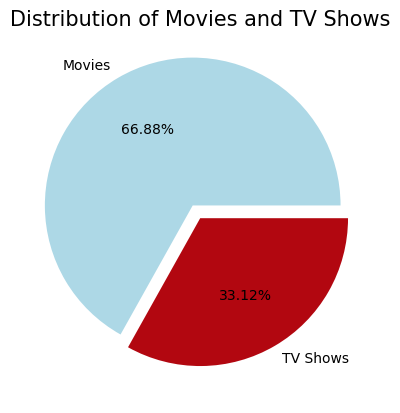

In [77]:
#PieChart to visualize the distribuition between Movies and TV Shows.
Vis_Category = Vis_Netflix['Type'].value_counts()
labels = ['Movies', 'TV Shows']
colours = ['lightblue', '#b20710']
explode = (0.1, 0)
plt.pie(Vis_Category, labels=labels, explode=explode, autopct='%2.2f%%',colors=colours)
plt.title('Distribution of Movies and TV Shows', fontsize=15)
plt.show()

On Netflix, movies make up the majority of content available (outside of the USA), accounting for 66.88%. In comparison, TV shows make up 33.12% of the available content.

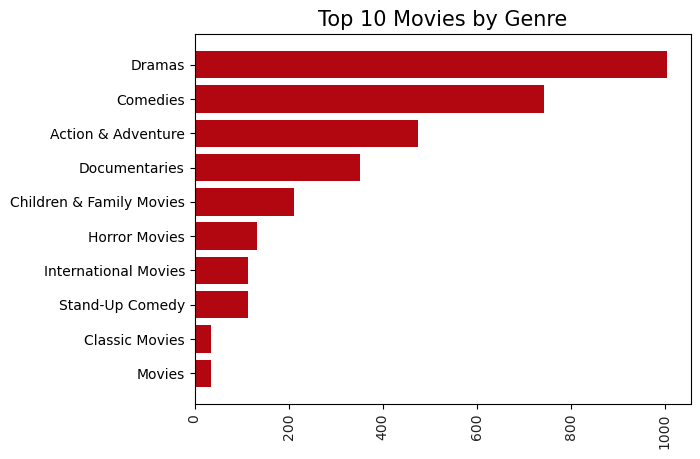

In [78]:
#Horizontal barchart to visualize the total of Movies by Genre.
Vis_Category_Movie = Vis_Netflix[Vis_Netflix['Type'] == "Movie"]['Genre'].value_counts().reset_index().head(10).sort_values(ascending=True, by='Genre')

netflix_colors = ['#221f1f', '#b20710']

plt.barh(Vis_Category_Movie['index'], Vis_Category_Movie['Genre'], color=netflix_colors[1])
plt.title('Top 10 Movies by Genre', fontsize=15)
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

Drama is leading the top 10 movies genre content available on Netflix (outside of the USA) with over 1000 movies, followed by comedies with 744, Action and Adventure with 475, Documentaries with 352, Children and Family Movies with 211, Horror Movies with 133, International Movies and Stand-Up Comedy with 114 and 113 respectively. The other genres have less than 50 content available on the platform.

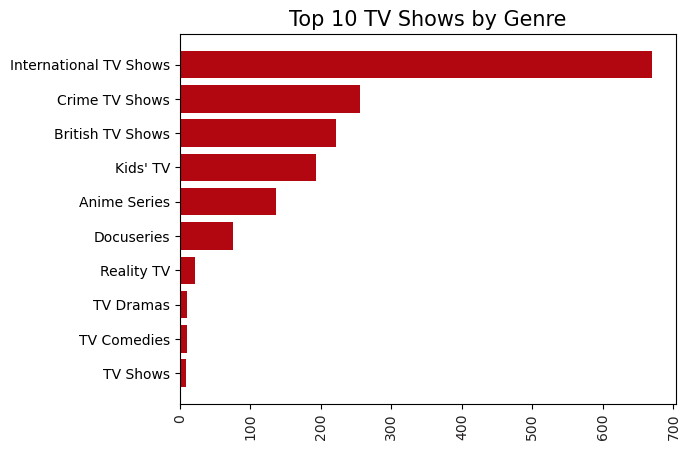

In [79]:
#Horizontal barchart to visualize the total of TV Shows by Genre.
Vis_Category_TV = Vis_Netflix[Vis_Netflix['Type'] == "TV Show"]['Genre'].value_counts().reset_index().head(10).sort_values(ascending=True, by='Genre')

netflix_colors = ['#221f1f', '#b20710']

plt.barh(Vis_Category_TV['index'], Vis_Category_TV['Genre'], color=netflix_colors[1])
plt.title('Top 10 TV Shows by Genre', fontsize=15)
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

International TV Show is leading the top 10 TV Shows genre content available on Netflix (outside of the USA) with almost 700 TV Shows, followed by Crime TV Show with 256, not too far British TV Show with 222 and Kid's TV with 193, Anime Series with 136, Docuseries with 76 and Reality TV with 21. The other genres have 10 or less content available on the platform.

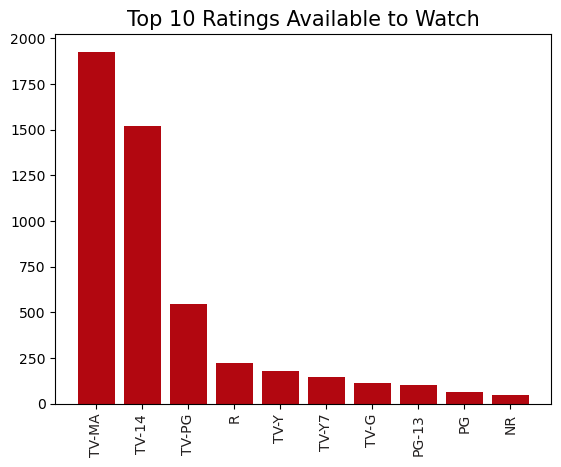

In [80]:
#Barchart to visualize the ratings available to watch.
Vis_rating = Vis_Netflix['Rating'].value_counts().sort_values(ascending=False).head(10).reset_index()
netflix_colors = ['#221f1f', '#b20710']

plt.bar(Vis_rating['index'], Vis_rating['Rating'], color=netflix_colors[1])
plt.title('Top 10 Ratings Available to Watch', fontsize=15)
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

First, Ratings is used to rate if a film is suitable for certain audience based on its content. Here are some examples of Ratings:

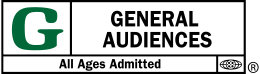
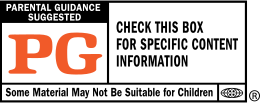
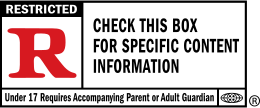


TV-MA stands for TV Mature and it is recomended for 18+ years old only. 

TV-14 stands for TV 14 years old over.

TV-PG stands for Parental Guidance and it is recomended for kids to watch with parents or guardians.

R stands for Restricted and it is also recomended that kids under 17 watch the content with their parents or guardians.

TV-Y stands for TV young and it is appropriated for kids of all ages.

TV-Y7 stands for TV young 7+ years old over.

TV-G stands for TV General and may have some mild content but is appropriate for all ages.

PG-13 stands for Parental Guidance 13+ years old.

PG stands for Parental Guidance and must be watched accompanying with parents or guardians.

NR stands for Not Rated and means that the content has not been evaluated.


Here we observe that TV-MA is leading the Netflix ratings content (outside of the USA) with 1926, followed by TV-14 with 1519, TV-PG with 543, R with 225, TV-Y with 176, TV-Y7 with 147, TV-G with 111, PG-13 with 103. The other ratings have less than 100.

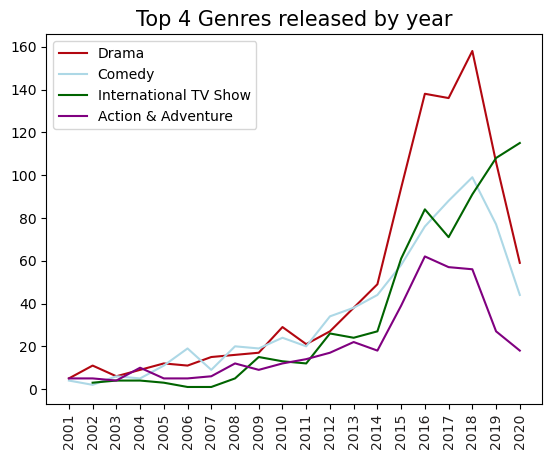

In [81]:
#Lineplot to visualize the top 4 genres by year.
Vis_drama_year = Vis_Netflix_Drama['Release Year'].value_counts().reset_index().sort_values(by='index').tail(20)
Vis_Comedies_year = Vis_Netflix_Comedies['Release Year'].value_counts().reset_index().sort_values(by='index').tail(20)
Vis_ITS_year = Vis_Netflix_ITS['Release Year'].value_counts().reset_index().sort_values(by='index').tail(19)
Vis_AA_year = Vis_Netflix_AA['Release Year'].value_counts().reset_index().sort_values(by='index').tail(20)
netflix_color = ['#b20710']

drama, = plt.plot(Vis_drama_year['index'], Vis_drama_year['Release Year'], color=netflix_color[0], label='Drama')
comedy, = plt.plot(Vis_Comedies_year['index'], Vis_Comedies_year['Release Year'], color='lightblue', label='Comedy')
its, = plt.plot(Vis_ITS_year['index'], Vis_ITS_year['Release Year'], color='darkgreen', label='International TV Show')
aa, = plt.plot(Vis_AA_year['index'], Vis_AA_year['Release Year'], color='purple', label='Action & Adventure')

plt.title('Top 4 Genres released by year', fontsize=15)
plt.legend(handles=[drama, comedy, its ,aa], loc='best')
plt.xticks(Vis_drama_year['index'].astype(int), rotation=90, color=netflix_colors[0])
plt.show()

Here we can observe the top 4 genre relased by year (outside of the USA) with Drama reaching the top releases in 2018 with 158. In comparison, Action and Adventure had their top relases in 2016 with only 62 films. It is also observable that in 2020 International TV Show has more releases than any other genre with 115 against only 59 Drama genre.

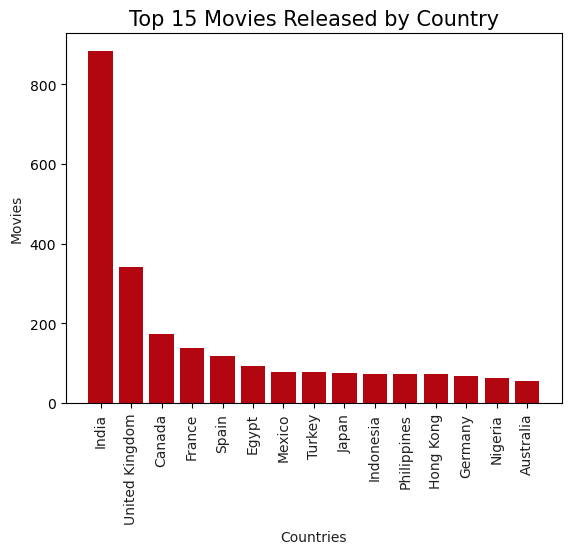

In [82]:
#Barchart to visualize the Movies by country.
Vis_Movies = Vis_Netflix_Movie[Vis_Netflix_Movie['Type'] == 'Movie']['Country'].value_counts().sort_values(ascending=False).head(15).reset_index()
netflix_colors = ['#221f1f', '#b20710']

plt.bar(Vis_Movies['index'], Vis_Movies['Country'], color=netflix_colors[1])
plt.title('Top 15 Movies Released by Country', fontsize=15)
plt.xlabel('Countries', color = netflix_colors[0])
plt.ylabel('Movies', color = netflix_colors[0])
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

Here we observe that India is leading the top 15 Movies released by country (outside of the USA) with 883 films realeased. Followed by United Kingdom with 341, Canada with 174, France with 137, Spain 119, Egypt with 93, Mexico with 79, Turkey with 77, Japan with 75, Indonesia, Philippines and Hong Kong with 74 realeses. The others countries have less than 70 movies released.

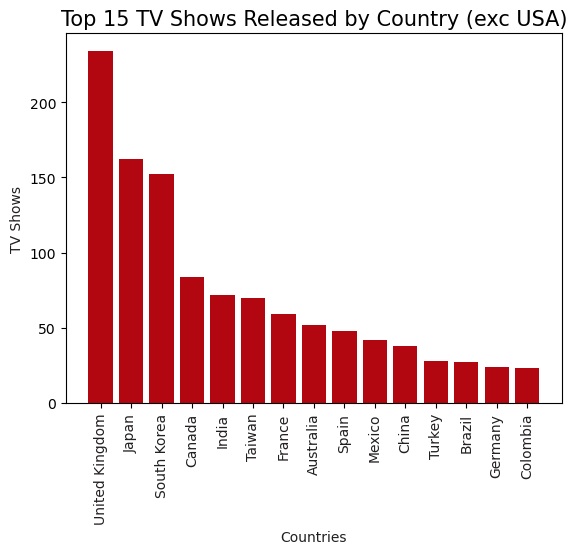

In [83]:
#Barchart to visualize the TV Shows by country.
Vis_TV = Vis_Netflix_TV[Vis_Netflix_TV['Type'] == 'TV Show']['Country'].value_counts().sort_values(ascending=False).head(15).reset_index()
netflix_colors = ['#221f1f', '#b20710']

plt.bar(Vis_TV['index'], Vis_TV['Country'], color=netflix_colors[1])
plt.title('Top 15 TV Shows Released by Country (exc USA)', fontsize=15)
plt.xlabel('Countries', color = netflix_colors[0])
plt.ylabel('TV Shows', color = netflix_colors[0])
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

Here we observe that United Kingdom is leading the top 15 TV Shows released by country (outside of the USA) with 253 content realeased. Followed by Japan with 162, South Korea with 152, Canada with 84, India now had only 72 TV Shows released, Taiwan with 70, France with 59, Australia with 52, Spain with 48, Mexico with 42 realeses China with 38. The others countries have less than 30 TV Shows released.

## Second section, USA only

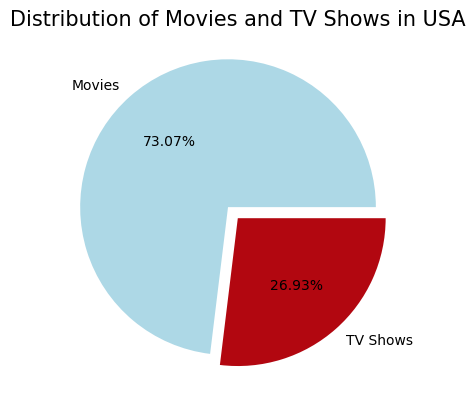

In [84]:
#PieChart to visualize the distribuition between Movies and TV Shows in USA.
Vis_Category_USA = Vis_Netflix_USA['Type'].value_counts()
labels = ['Movies', 'TV Shows']
colours = ['lightblue', '#b20710']
explode = (0.1, 0)
plt.pie(Vis_Category_USA, labels=labels, explode=explode, autopct='%2.2f%%',colors=colours)
plt.title('Distribution of Movies and TV Shows in USA', fontsize=15)
plt.show()

On Netflix, movies make up the majority of content available in USA, accounting for 73.07%. In comparison, TV shows make up 26.93% of the available content.

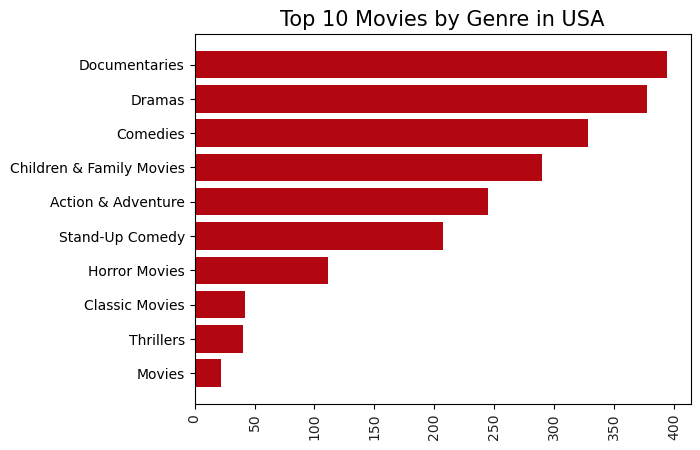

In [85]:
#Horizontal barchart to visualize the total of Movies by Genre in USA.
Vis_Category_Movie_USA = Vis_Netflix_USA[Vis_Netflix_USA['Type'] == "Movie"]['Genre'].value_counts().reset_index().head(10).sort_values(ascending=True, by='Genre')

netflix_colors = ['#221f1f', '#b20710']

plt.barh(Vis_Category_Movie_USA['index'], Vis_Category_Movie_USA['Genre'], color=netflix_colors[1])
plt.title('Top 10 Movies by Genre in USA', fontsize=15)
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

Documentaries is leading the top 10 movies genre content available on Netflix in USA with 394 movies, followed by drama with 377, comedies with 328, children and family movies with 290, Action and Adventure with 245, Stand-up comedy with 207, Horror Movies with 111. The other genres have less than 50 content available on the platform.

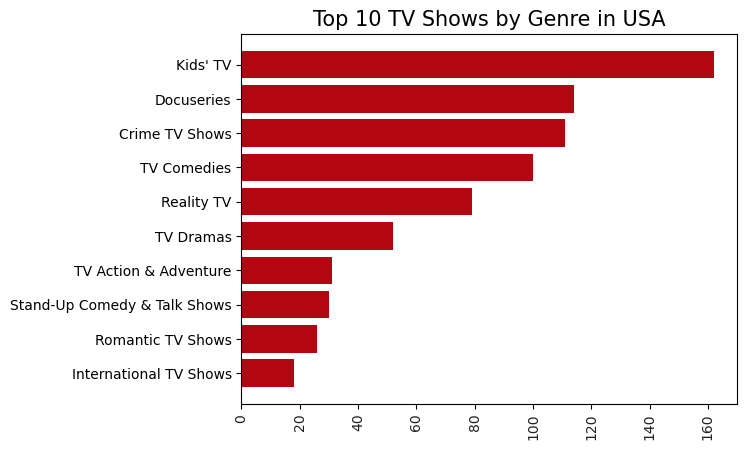

In [86]:
#Horizontal barchart to visualize the total of TV Shows by Genre in USA.
Vis_Category_TV_USA = Vis_Netflix_USA[Vis_Netflix_USA['Type'] == "TV Show"]['Genre'].value_counts().reset_index().head(10).sort_values(ascending=True, by='Genre')

netflix_colors = ['#221f1f', '#b20710']

plt.barh(Vis_Category_TV_USA['index'], Vis_Category_TV_USA['Genre'], color=netflix_colors[1])
plt.title('Top 10 TV Shows by Genre in USA', fontsize=15)
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

Kids'TV is leading the top 10 TV Shows genre content available on Netflix in USA with 162 TV Shows, followed by Docuseries with 114, not too far Crime TV Shows with 111 and TV Comedies with 100, Reality TV with 79 and TV Dramas with 52. The other genres have less than 40 content available on the platform.

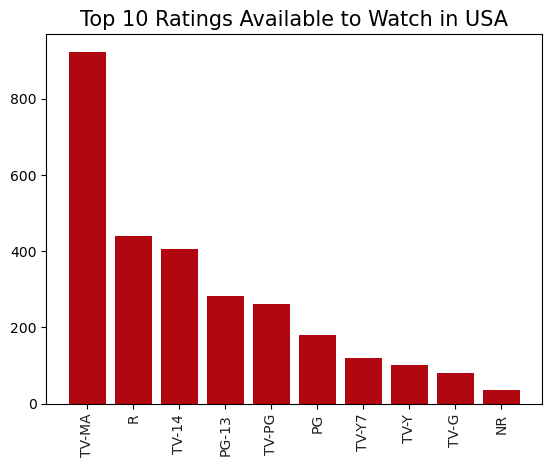

In [87]:
#Barchart to visualize the ratings available to watch in USA.
Vis_rating_USA = Vis_Netflix_USA['Rating'].value_counts().reset_index().sort_values(ascending=False, by='Rating').head(10)
netflix_colors = ['#221f1f', '#b20710']

plt.bar(Vis_rating_USA ['index'], Vis_rating_USA ['Rating'], color=netflix_colors[1])
plt.title('Top 10 Ratings Available to Watch in USA', fontsize=15)
plt.xticks(rotation=90, color = netflix_colors[0])
plt.show()

Here we observe that TV-MA is leading the Netflix ratings content in USA with 923, followed by R with 439, TV-14 with 405, PG-13 with 283, TV-PG with 261, PG with 181, TV-Y7 with 121, TV-Y with 102. The other ratings have less than 100.

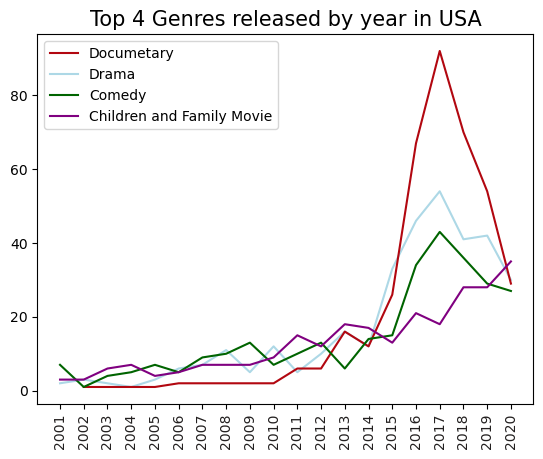

In [88]:
#Lineplot to visualize the top 4 genres by year in USA.
Vis_drama_year_USA = Vis_Netflix_Drama_USA['Release Year'].value_counts().reset_index().sort_values(by='index').tail(20)
Vis_doc_year_USA = Vis_Netflix_Doc_USA['Release Year'].value_counts().reset_index().sort_values(by='index').tail(17)
Vis_comedies_year_USA = Vis_Netflix_Comedies_USA['Release Year'].value_counts().reset_index().sort_values(by='index').tail(20)
Vis_cfm_year_USA = Vis_Netflix_CFM_USA['Release Year'].value_counts().reset_index().sort_values(by='index').tail(20)
netflix_colors = ['#221f1f', '#b20710']

drama_USA, = plt.plot(Vis_drama_year_USA['index'], Vis_drama_year_USA['Release Year'], color='lightblue', label='Drama')
doc_USA, = plt.plot(Vis_doc_year_USA['index'], Vis_doc_year_USA['Release Year'], color=netflix_colors[1], label='Documetary')
comedies_USA, = plt.plot(Vis_comedies_year_USA['index'], Vis_comedies_year_USA['Release Year'], color='darkgreen', label='Comedy')
cfm_USA, = plt.plot(Vis_cfm_year_USA['index'], Vis_cfm_year_USA['Release Year'], color='purple', label='Children and Family Movie')
plt.title('Top 4 Genres released by year in USA', fontsize=15)
plt.legend(handles=[doc_USA, drama_USA, comedies_USA ,cfm_USA], loc='best')
plt.xticks(Vis_drama_year_USA['index'].astype(int), rotation=90, color=netflix_colors[0])
plt.show()

Here we can observe the top 4 genre relased by year in USA with Documentary reaching the top releases in 2017 with 92 releases. In comparison, Drama had their top relases in 2017 as well with 54 films. It is also observable that in 2020 Children and Family Movies has more releases than any other genre with 35 against Drama and Documentary with 30 and 29 respectively.